# **TensorFlow Lite Model Inference with Classification Report and Confusion Matrix**

This Python notebook showcases loading a TensorFlow Lite (TFLite) model, performing inference on test data, and evaluating its performance using classification metrics and a confusion matrix. It guides through model loading, prediction, and analysis using precision, recall, F1-score, and support.



In [ ]:
%run -i Training.ipynb

### **Importing necesaary libraries**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### **TensorFlow Lite Model Inference for Food Ingredients Classification**


In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="/content/saved_models/Food_ingredients_classifier.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Arrays to store predicted and actual labels
predicted_labels = []
actual_labels = []

# Perform inference for all test data
for batch_images, labels in test_ds:
    for image, label in zip(batch_images, labels):
        # Preprocess the image to match the input shape expected by the model
        input_image = tf.image.resize(image, (224, 224))
        input_image = np.expand_dims(input_image, axis=0)

        # Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_image)

        # Run inference
        interpreter.invoke()

        # Get the output tensor
        output_data = interpreter.get_tensor(output_details[0]['index'])

        # Convert one-hot encoded output to class label
        predicted_class = np.argmax(output_data, axis=1)[0]

        # Append predicted and actual labels
        predicted_labels.append(predicted_class)
        actual_labels.append(label.numpy())

# Convert lists to numpy arrays
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

### **Compute classification report**

In [ ]:
class_names = [data_cat[i] for i in range(len(data_cat))]
print(classification_report(actual_labels, predicted_labels, target_names=class_names))

                  precision    recall  f1-score   support

           Apple       1.00      1.00      1.00        10
       Artichoke       1.00      0.90      0.95        10
       Asparagus       0.91      1.00      0.95        10
         Avocado       0.91      1.00      0.95        10
           Bacon       0.91      1.00      0.95        10
          Banana       1.00      1.00      1.00        10
        Beetroot       1.00      1.00      1.00        10
    Bitter Gourd       1.00      1.00      1.00        10
    Bottle Gourd       1.00      0.90      0.95        10
           Bread       1.00      1.00      1.00        10
         Brinjal       0.90      0.90      0.90        10
        Broccoli       0.83      1.00      0.91        10
          Butter       1.00      1.00      1.00        10
         Cabbage       1.00      0.80      0.89        10
        Capsicum       0.77      1.00      0.87        10
          Carrot       1.00      1.00      1.00        10
     Cauliflo

### **Plot confusion matrix as heatmap**

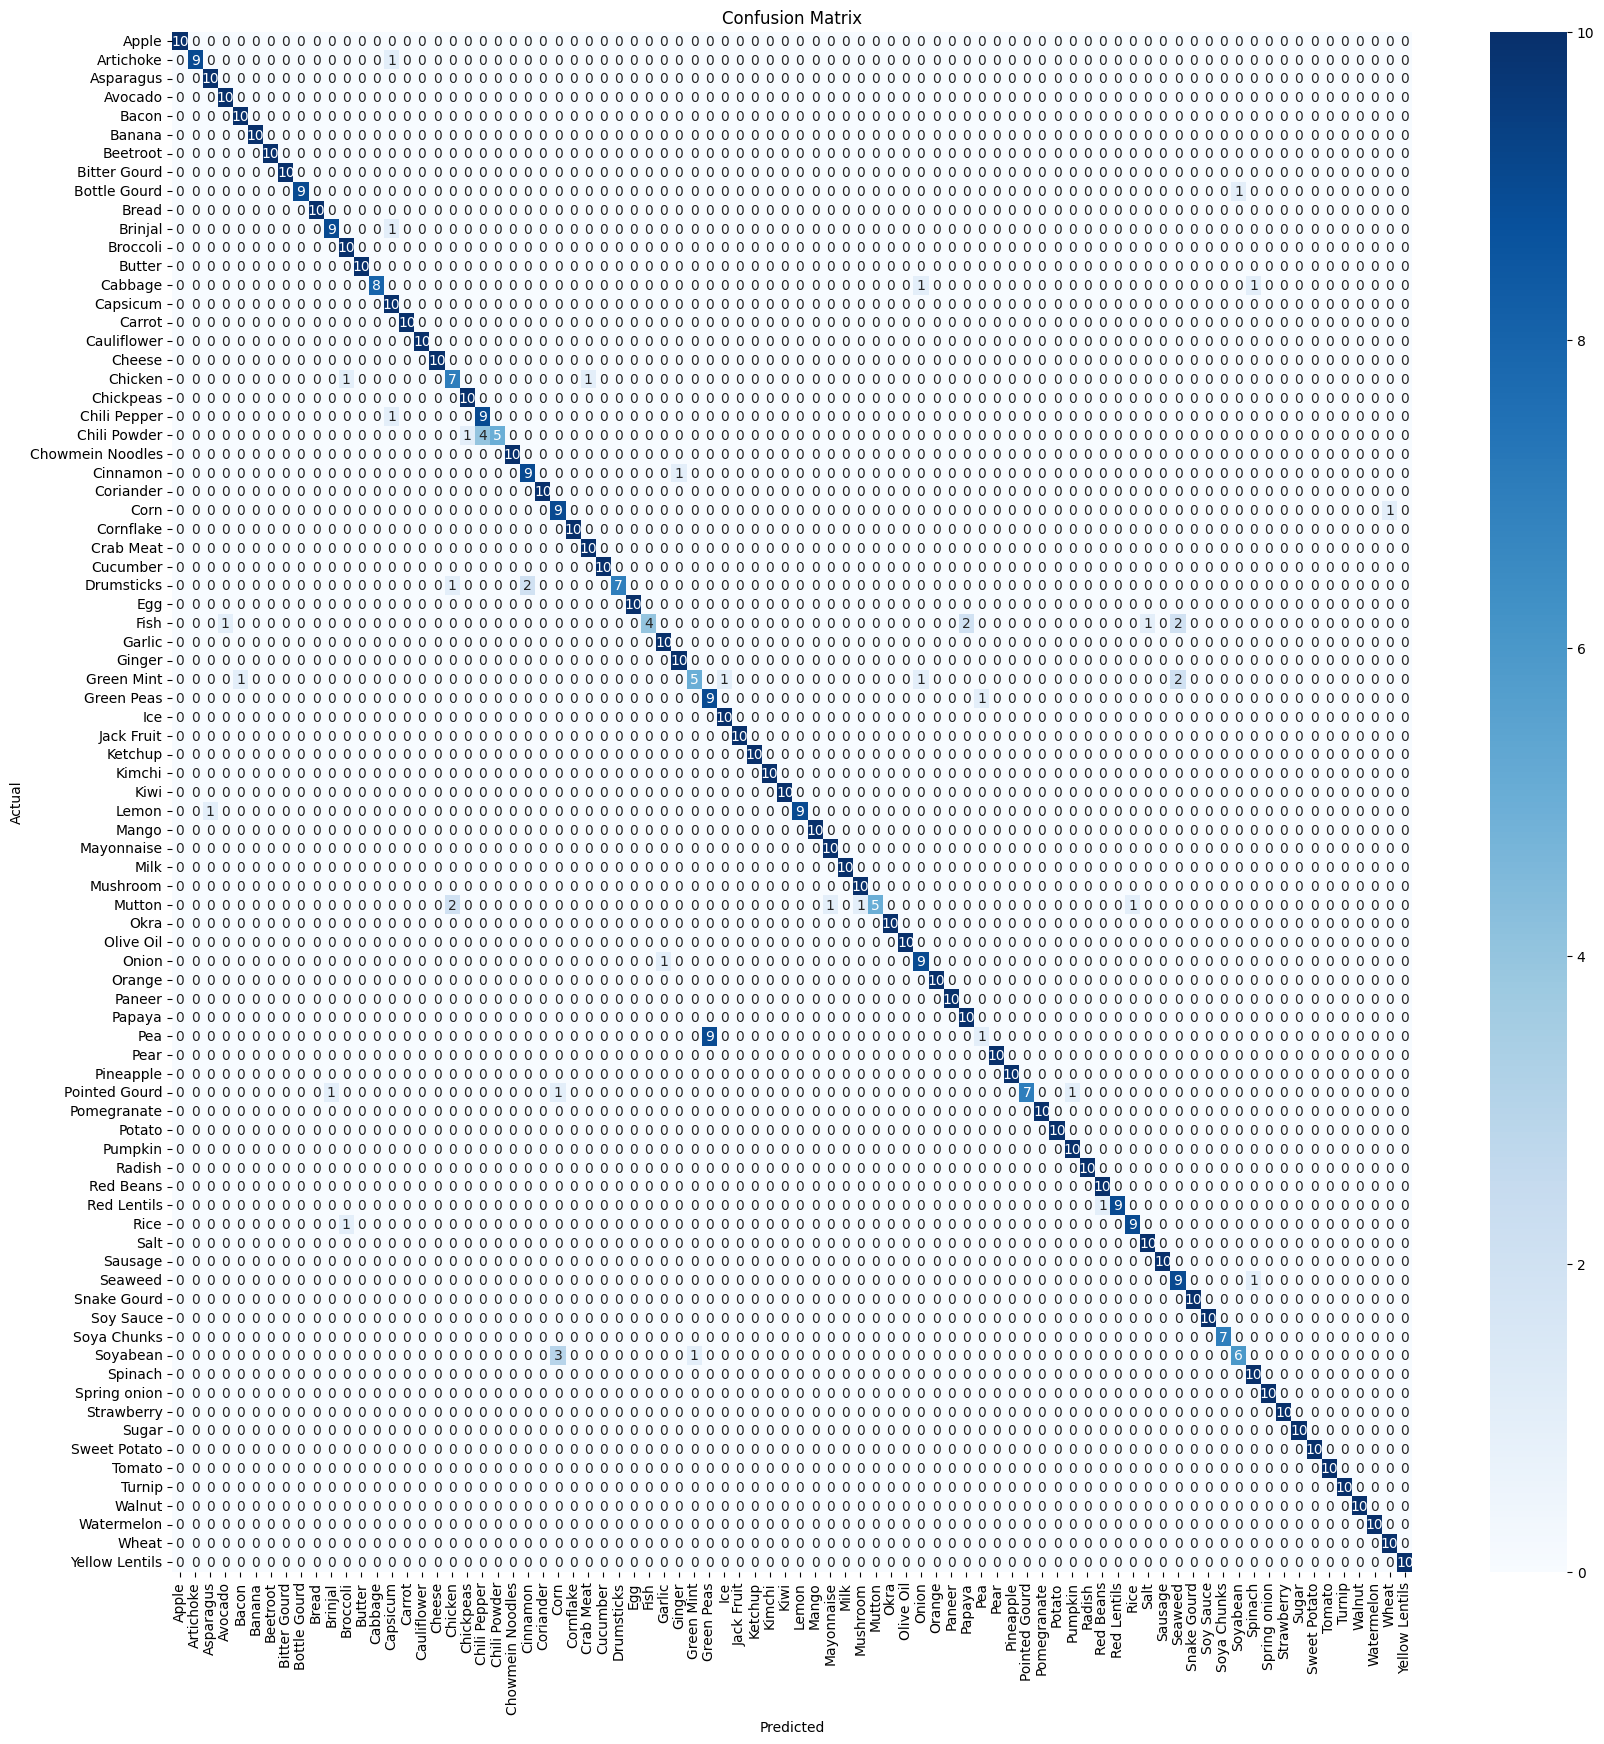

In [ ]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(20, 20))

# Plot a heatmap of the confusion matrix with annotations and integer formatting
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Add labels for the x-axis and y-axis
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add a title to the plot
plt.title("Confusion Matrix")

# Display the plot
plt.show()